In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils_local import heatmap, read_spreadsheet

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [4]:
df = read_spreadsheet(gid_key="granularity")

# deletes row 0
df = df.drop(index=0).reset_index(drop=True)
df.dropna(inplace=True)

In [5]:
df

,Unnamed: 0,Gym99,Unnamed: 2,Gym288,Unnamed: 4,Vault (6),Unnamed: 6,FX,Unnamed: 8,FX-S1 (11),Unnamed: 10,UB-S1,Unnamed: 12
0,None,89.41,84.41,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
1,MoCo,90.65,86.23,85.81,55.08,45.29,33.26,85.62,83.26,71.43,65.13,89.53,85.04
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,91.28,87.59,86.11,55.2,43.72,33.35,85.41,82.72,71.31,63.51,89.06,85.12
4,VideoMoCo,90.54,86.36,85.31,54.07,43.27,28.36,84.19,79.52,68.61,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.71,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,45.96,36.92,85.81,83.64,72.84,65.72,88.17,81.62
9,AVID-CMA,90.56,85.83,85.96,52.46,45.52,30.35,85.98,82.65,75.29,67.15,92.45,88.41


In [6]:
# # csv_path = "../../results/sslvr-action_classification_finegym_all.csv"
# csv_path = "../../results/temporal_granularity_v1.csv"

In [7]:
# df = pd.read_csv(csv_path)
# df.dropna(inplace=True)

### Preprocessing

In [8]:
df = df.rename(
    columns={
        "Unnamed: 0": "Method",
        "Gym99": "Gym99 (99) (video)",
        "Unnamed: 2": "Gym99 (99) (class)",
        "Gym288": "Gym288 (288) (video)",
        "Unnamed: 4": "Gym288 (288) (class)",
        "Vault (6)": "Vault (6) (video)",
        "Unnamed: 6": "Vault (6) (class)",
        "FX": "FX (35) (video)",
        "Unnamed: 8": "FX (35) (class)",
        "FX-S1 (11)": "FX-S1 (11) (video)",
        "Unnamed: 10": "FX-S1 (11) (class)",
        "UB-S1": "UB-S1 (15) (video)",
        "Unnamed: 12": "UB-S1 (15) (class)",
    }
)

In [9]:
df

,Method,Gym99 (99) (video),Gym99 (99) (class),Gym288 (288) (video),Gym288 (288) (class),Vault (6) (video),Vault (6) (class),FX (35) (video),FX (35) (class),FX-S1 (11) (video),FX-S1 (11) (class),UB-S1 (15) (video),UB-S1 (15) (class)
0,None,89.41,84.41,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
1,MoCo,90.65,86.23,85.81,55.08,45.29,33.26,85.62,83.26,71.43,65.13,89.53,85.04
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,RSPNet,91.28,87.59,86.11,55.2,43.72,33.35,85.41,82.72,71.31,63.51,89.06,85.12
4,VideoMoCo,90.54,86.36,85.31,54.07,43.27,28.36,84.19,79.52,68.61,60.39,87.9,82.07
5,Pretext-contrast,90.31,85.71,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
6,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
7,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
8,GDT,90.36,86.46,85.74,55.36,45.96,36.92,85.81,83.64,72.84,65.72,88.17,81.62
9,AVID-CMA,90.56,85.83,85.96,52.46,45.52,30.35,85.98,82.65,75.29,67.15,92.45,88.41


In [10]:
for col in df.columns:
    if col != "Method":
        df[col] = df[col].astype(float)

In [11]:
# reorder columns based on UCF performance

df_finetune = read_spreadsheet(gid_key="domain_shift_finetune", index_col=0)
df_finetune.sort_values("UCF101", inplace=True)
df = df.set_index("Method").loc[list(df_finetune.index)].reset_index()

In [12]:
df

,Method,Gym99 (99) (video),Gym99 (99) (class),Gym288 (288) (video),Gym288 (288) (class),Vault (6) (video),Vault (6) (class),FX (35) (video),FX (35) (class),FX-S1 (11) (video),FX-S1 (11) (class),UB-S1 (15) (video),UB-S1 (15) (class)
0,None,89.41,84.41,84.71,50.01,41.26,24.67,79.16,75.88,50.32,44.98,88.44,83.98
1,MoCo,90.65,86.23,85.81,55.08,45.29,33.26,85.62,83.26,71.43,65.13,89.53,85.04
2,SeLaVi,88.93,84.75,83.68,52.82,43.72,25.44,80.01,76.04,57.92,50.15,85.11,81.46
3,VideoMoCo,90.54,86.36,85.31,54.07,43.27,28.36,84.19,79.52,68.61,60.39,87.90,82.07
4,Pretext-contrast,90.31,85.71,85.42,52.66,46.19,28.48,84.68,81.37,72.84,65.78,90.62,86.24
5,RSPNet,91.28,87.59,86.11,55.20,43.72,33.35,85.41,82.72,71.31,63.51,89.06,85.12
6,AVID-CMA,90.56,85.83,85.96,52.46,45.52,30.35,85.98,82.65,75.29,67.15,92.45,88.41
7,CTP,92.17,88.33,87.33,56.51,44.17,26.83,88.99,86.16,84.68,79.66,92.32,88.44
8,TCLR,91.49,87.97,86.93,55.37,46.19,29.84,87.38,84.25,69.63,61.02,90.48,85.29
9,GDT,90.36,86.46,85.74,55.36,45.96,36.92,85.81,83.64,72.84,65.72,88.17,81.62


### Plot video-wise

In [13]:
df_video = df[[x for x in df.columns if "video" in x or "Method" in x]]

In [14]:
df_video = df_video.set_index(keys=["Method"])

In [15]:
# # re-order based on Gym99 performance
# df_video.sort_values("Gym99 (video)", inplace=True)

In [16]:
df_video

,Gym99 (99) (video),Gym288 (288) (video),Vault (6) (video),FX (35) (video),FX-S1 (11) (video),UB-S1 (15) (video)
Method,,,,,,
None,89.41,84.71,41.26,79.16,50.32,88.44
MoCo,90.65,85.81,45.29,85.62,71.43,89.53
SeLaVi,88.93,83.68,43.72,80.01,57.92,85.11
VideoMoCo,90.54,85.31,43.27,84.19,68.61,87.90
Pretext-contrast,90.31,85.42,46.19,84.68,72.84,90.62
RSPNet,91.28,86.11,43.72,85.41,71.31,89.06
AVID-CMA,90.56,85.96,45.52,85.98,75.29,92.45
CTP,92.17,87.33,44.17,88.99,84.68,92.32
TCLR,91.49,86.93,46.19,87.38,69.63,90.48


### Plot normalized

In [17]:
norm_df=(df_video-df_video.loc["None"])/(df_video.loc["Supervised"]-df_video.loc["None"])

In [18]:
norm_df

,Gym99 (99) (video),Gym288 (288) (video),Vault (6) (video),FX (35) (video),FX-S1 (11) (video),UB-S1 (15) (video)
Method,,,,,,
None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MoCo,0.525424,0.376712,0.499380,0.659857,0.614377,0.516588
SeLaVi,-0.203390,-0.352740,0.304833,0.086823,0.221187,-1.578199
VideoMoCo,0.478814,0.205479,0.249071,0.513790,0.532305,-0.255924
Pretext-contrast,0.381356,0.243151,0.610905,0.563841,0.655413,1.033175
RSPNet,0.792373,0.479452,0.304833,0.638407,0.610885,0.293839
AVID-CMA,0.487288,0.428082,0.527881,0.696629,0.726717,1.900474
CTP,1.169492,0.897260,0.360595,1.004086,1.000000,1.838863
TCLR,0.881356,0.760274,0.610905,0.839632,0.561991,0.966825


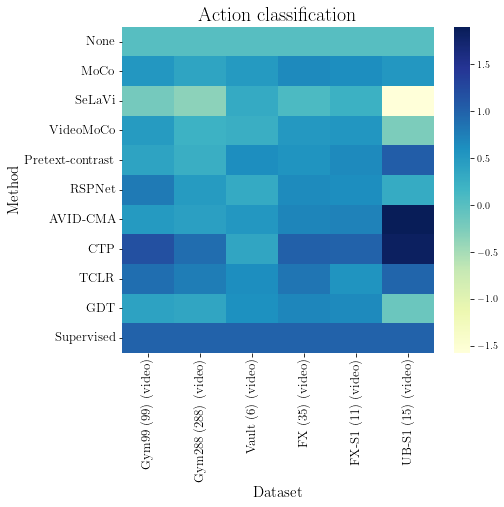

In [19]:
heatmap(norm_df)

### Plot normalized

In [20]:
def heatmap(
        df,
        figsize=(7, 6),
        title="Action classification",
        titlesize=20,
        labelsize=15,
        tickssize=13,
        save=False,
        save_path="../../results/plots/sample.pdf",
        **kwargs,
    ):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    if "cmap" not in kwargs:
        kwargs.update(dict(cmap="YlGnBu"))
    sns.heatmap(df, ax=ax, **kwargs)

    ax.set_title(title, fontsize=titlesize)

    ax.set_xlabel("Dataset")
    ax.set_ylabel("Method")
    
    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig(save_path, bbox_inches="tight")

    plt.show()

In [21]:
norm_df=(df_video-df_video.min())/(df_video.max()-df_video.min())

In [22]:
annot = df_video.values
annot = np.round(annot, decimals=3)

In [23]:
norm_df.columns = [x.replace(" (video)", "") for x in norm_df.columns]

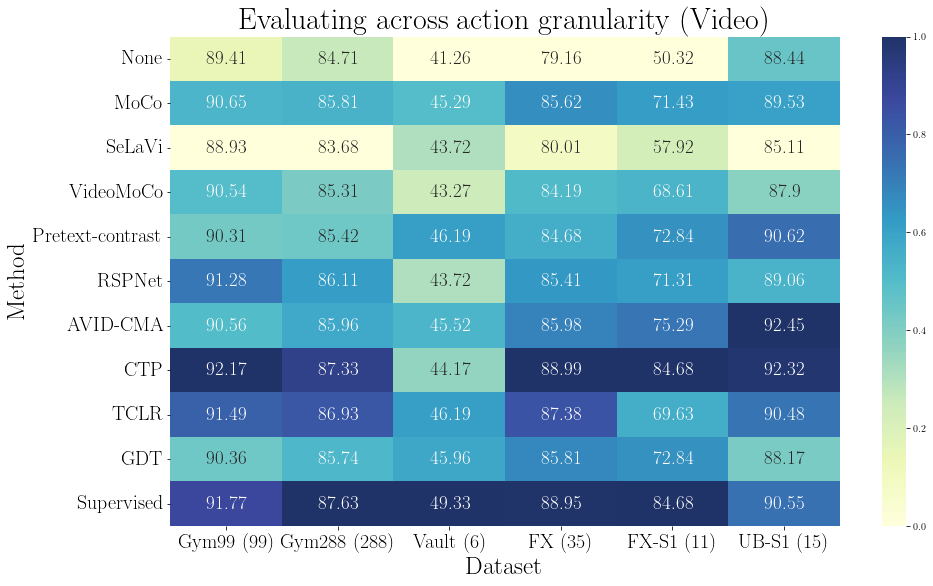

In [24]:
heatmap(
    norm_df,
    figsize=(15, 9),
    title="Evaluating across action granularity (Video)",
    titlesize=30,
    labelsize=25,
    tickssize=20,
    save=True,
    save_path="../../results/plots/temporal_granularity_video_v3.pdf",
    cmap="YlGnBu",
    alpha=0.9,
    annot=annot,
    fmt='g',
    annot_kws={"size": 19},
)

### Plot class-wise

In [25]:
df_class = df[[x for x in df.columns if "class" in x or "Method" in x]]
df_class = df_class.set_index(keys=["Method"])

In [26]:
# df_class.sort_values("Gym99 (class)", inplace=True)

In [27]:
norm_df=(df_class-df_class.min())/(df_class.max()-df_class.min())

In [28]:
annot = df_class.values
annot = np.round(annot, decimals=3)

In [29]:
norm_df.columns = [x.replace(" (class)", "") for x in norm_df.columns]

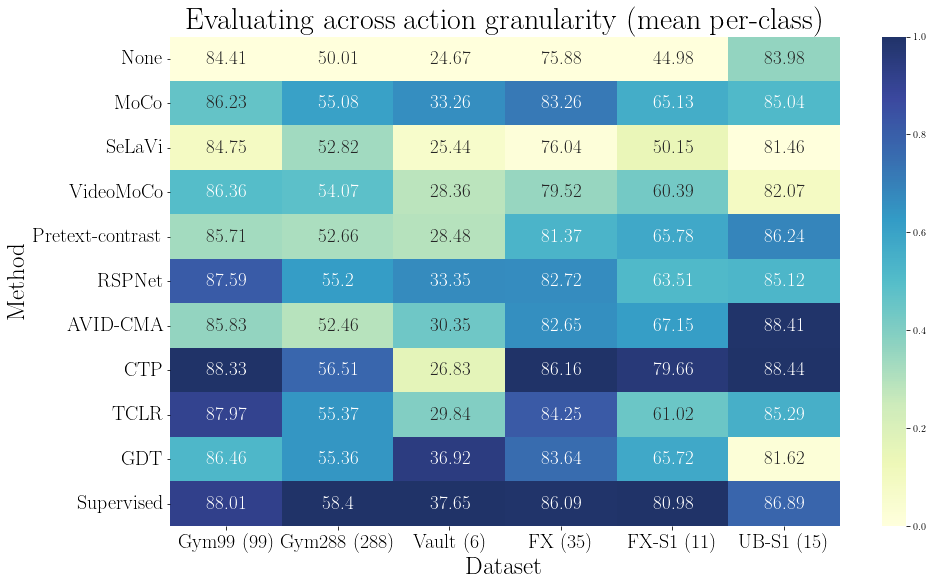

In [30]:
heatmap(
    norm_df,
    figsize=(15, 9),
    title="Evaluating across action granularity (mean per-class)",
    titlesize=30,
    labelsize=25,
    tickssize=20,
    save=True,
    save_path="../../results/plots/temporal_granularity_class_v3.pdf",
    cmap="YlGnBu",
    alpha=0.9,
    annot=annot,
    fmt='g',
    annot_kws={"size": 19},
)